In [182]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

In [183]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

It here to fetch the files in datasets/lifesat.

In [184]:
import os
datapath = os.path.join("datasets", "lifesat", "")

To visualize the graph

In [185]:
# To plot pretty figures directly within Jupyter
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Load and prepare Life satisfaction data
If you want, you can get fresh data from the OECD's website. Download the CSV from http://stats.oecd.org/index.aspx?DataSetCode=BLI and save it to datasets/lifesat/.

In [186]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

oecd_bil = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capital = pd.read_csv(datapath + "gdp_per_capita.csv", thousands=',', 
                             delimiter='\t', encoding='latin1', na_values='n/a')

In [187]:
oecd_bil.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.0,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.2,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.9,NaN,NaN


In [188]:
oecd_bil.describe()

,PowerCode Code,Reference Period Code,Reference Period,Value
count,3292.0,0.0,0.0,3292.000000
mean,0.0,NaN,NaN,4774.392587
std,0.0,NaN,NaN,13941.537833
min,0.0,NaN,NaN,0.000000
25%,0.0,NaN,NaN,6.600000
50%,0.0,NaN,NaN,49.000000
75%,0.0,NaN,NaN,90.000000
max,0.0,NaN,NaN,145769.000000


In [189]:
gdp_per_capital.head()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [190]:
gdp_per_capital["Country"].nunique()

190

In [191]:
gdp_per_capital.describe()

,2015,Estimates Start After
count,187.000000,188.000000
mean,12590.961401,1969.250000
std,17387.035890,291.147823
min,220.860000,0.000000
25%,1783.538000,2011.000000
50%,5373.633000,2013.000000
75%,15490.576500,2014.000000
max,101994.093000,2015.000000


# Feature extraction 
This function just merges the OECD's life satisfaction data and the IMF's GDP per capita data.

In [242]:
def prepare_country_satisfactions(oecd_bil, gdp_per_capital):
    oecd_bil = oecd_bil[oecd_bil["INEQUALITY"]=="TOT"]
    oecd_bil = oecd_bil.pivot(index="Country", columns="Indicator", values="Value")
    
    gdp_per_capital.rename(columns={"2015": "GDP per capital"}, inplace=True)
    gdp_per_capital.set_index("Country", inplace=True)
    full_country_satisfactions = pd.merge(left=oecd_bil, right=gdp_per_capital, left_index=True, right_index=True)
    full_country_satisfactions.sort_values(by='GDP per capital', inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_satisfactions[["GDP per capital", 'Life satisfaction']].iloc[keep_indices]

# Saving figure in project directory
Create a function to save the figures.

In [194]:
# Saving the figures of this projects
PROJECT_ROOT_DIR = '.'
CHAPTER_ID = 'fundamentals'
IMAGE_PATH = os.path.join(PROJECT_ROOT_DIR, 'images', CHAPTER_ID)
os.makedirs(IMAGE_PATH, exist_ok=True)

def save_figure(fig_id, tight_layout=True, fig_extension='png', resolution=300):
    path = os.path.join(IMAGE_PATH, fig_id + '.' + fig_extension)
    print('Saving the figure', fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Make this notebook's output stable across runs:

In [195]:
np.random.seed(42)

In [196]:
oecd_bil = oecd_bil[oecd_bil["INEQUALITY"]=="TOT"]
oecd_bil = oecd_bil.pivot(index='Country', columns='Indicator', values='Value')
oecd_bil.head(2)

Indicator,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,...,1.08,50449.0,92.0,2.3,85.0,512.0,14.41,93.0,91.0,19.4
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,...,1.19,45199.0,89.0,1.6,69.0,500.0,14.46,75.0,94.0,17.0


In [197]:
print("Total Country:", oecd_bil['Life satisfaction'].count())
oecd_bil['Life satisfaction'].to_dict()

Total Country: 37


{'Australia': 7.3,
 'Austria': 6.9,
 'Belgium': 6.9,
 'Brazil': 7.0,
 'Canada': 7.3,
 'Chile': 6.7,
 'Czech Republic': 6.5,
 'Denmark': 7.5,
 'Estonia': 5.6,
 'Finland': 7.4,
 'France': 6.5,
 'Germany': 7.0,
 'Greece': 4.8,
 'Hungary': 4.9,
 'Iceland': 7.5,
 'Ireland': 7.0,
 'Israel': 7.4,
 'Italy': 6.0,
 'Japan': 5.9,
 'Korea': 5.8,
 'Luxembourg': 6.9,
 'Mexico': 6.7,
 'Netherlands': 7.3,
 'New Zealand': 7.3,
 'Norway': 7.4,
 'OECD - Total': 6.6,
 'Poland': 5.8,
 'Portugal': 5.1,
 'Russia': 6.0,
 'Slovak Republic': 6.1,
 'Slovenia': 5.7,
 'Spain': 6.5,
 'Sweden': 7.2,
 'Switzerland': 7.5,
 'Turkey': 5.6,
 'United Kingdom': 6.8,
 'United States': 7.2}

In [198]:
oecd_bil.columns.to_list()

['Air pollution',
 'Assault rate',
 'Consultation on rule-making',
 'Dwellings without basic facilities',
 'Educational attainment',
 'Employees working very long hours',
 'Employment rate',
 'Homicide rate',
 'Household net adjusted disposable income',
 'Household net financial wealth',
 'Housing expenditure',
 'Job security',
 'Life expectancy',
 'Life satisfaction',
 'Long-term unemployment rate',
 'Personal earnings',
 'Quality of support network',
 'Rooms per person',
 'Self-reported health',
 'Student skills',
 'Time devoted to leisure and personal care',
 'Voter turnout',
 'Water quality',
 'Years in education']

In [199]:
oecd_bil['Life satisfaction'].head(5)

Country
Australia    7.3
Austria      6.9
Belgium      6.9
Brazil       7.0
Canada       7.3
Name: Life satisfaction, dtype: float64

In [200]:
gdp_per_capital.rename(columns={"2015": "GDP per capital"}, inplace=True)
gdp_per_capital.set_index("Country", inplace=True)
gdp_per_capital.head(5)

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capital,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [201]:
gdp_per_capital.columns.to_list()

['Subject Descriptor',
 'Units',
 'Scale',
 'Country/Series-specific Notes',
 'GDP per capital',
 'Estimates Start After']

In [202]:
print("Total Country:", gdp_per_capital['GDP per capital'].count())
gdp_per_capital['GDP per capital'].to_dict()

Total Country: 187


{'Afghanistan': 599.994,
 'Albania': 3995.383,
 'Algeria': 4318.135,
 'Angola': 4100.315,
 'Antigua and Barbuda': 14414.302,
 'Argentina': 13588.846000000001,
 'Armenia': 3534.86,
 'Australia': 50961.865,
 'Austria': 43724.030999999995,
 'Azerbaijan': 5739.433000000001,
 'The Bahamas': 23902.805,
 'Bahrain': 23509.981,
 'Bangladesh': 1286.868,
 'Barbados': 15773.555,
 'Belarus': 5749.119000000001,
 'Belgium': 40106.632000000005,
 'Belize': 4841.735,
 'Benin': 780.063,
 'Bhutan': 2843.402,
 'Bolivia': 2886.2309999999998,
 'Bosnia and Herzegovina': 4088.212,
 'Botswana': 6040.956999999999,
 'Brazil': 8669.998,
 'Brunei Darussalam': 28236.64,
 'Bulgaria': 6831.661,
 'Burkina Faso': 614.5,
 'Burundi': 305.783,
 'Cabo Verde': 3038.511,
 'Cambodia': 1168.036,
 'Cameroon': 1232.423,
 'Canada': 43331.960999999996,
 'Central African Republic': 334.87,
 'Chad': 941.903,
 'Chile': 13340.905,
 'China': 7989.72,
 'Colombia': 6083.51,
 'Comoros': 736.3480000000001,
 'Democratic Republic of the Congo

In [203]:
full_country_satisfactions = pd.merge(left=oecd_bil, right=gdp_per_capital, left_index=True, right_index=True)
full_country_satisfactions.sort_values(by='GDP per capital', inplace=True)
full_country_satisfactions

,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capital,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,14.97,79.0,72.0,16.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",8669.998,2014.0
Mexico,30.0,12.8,9.0,4.2,37.0,28.83,61.0,23.4,13085.0,9056.0,...,13.89,63.0,67.0,14.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9009.280,2015.0
Russia,15.0,3.8,2.5,15.1,94.0,0.16,69.0,12.8,19292.0,3412.0,...,14.97,65.0,56.0,16.0,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9054.914,2015.0
Turkey,35.0,5.0,5.5,12.7,34.0,40.86,50.0,1.2,14095.0,3251.0,...,13.42,88.0,62.0,16.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9437.372,2013.0
Hungary,15.0,3.6,7.9,4.8,82.0,3.19,58.0,1.3,15442.0,13277.0,...,15.04,62.0,77.0,17.6,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",12239.894,2015.0
Poland,33.0,1.4,10.8,3.2,90.0,7.41,60.0,0.9,17852.0,10919.0,...,14.20,55.0,79.0,18.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",12495.334,2014.0
Chile,46.0,6.9,2.0,9.4,57.0,15.42,62.0,4.4,14533.0,17733.0,...,14.41,49.0,73.0,16.5,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",13340.905,2014.0
Slovak Republic,13.0,3.0,6.6,0.6,92.0,7.02,60.0,1.2,17503.0,8663.0,...,14.99,59.0,81.0,16.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",15991.736,2015.0
Czech Republic,16.0,2.8,6.8,0.9,92.0,6.98,68.0,0.8,18404.0,17299.0,...,14.98,59.0,85.0,18.1,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",17256.918,2015.0


In [204]:
full_country_satisfactions[["GDP per capital", "Life satisfaction"]].loc["United States"]

GDP per capital      55805.204
Life satisfaction        7.200
Name: United States, dtype: float64

In [205]:
remove_indices = [0, 1, 6, 8, 33, 34, 35]
keep_indices = list(set(range(36)) - set(remove_indices))
sample_data = full_country_satisfactions[["GDP per capital", "Life satisfaction"]].iloc[keep_indices]
missing_data = full_country_satisfactions[["GDP per capital", "Life satisfaction"]].iloc[remove_indices]

Saving the figure money_happy_scatterplot


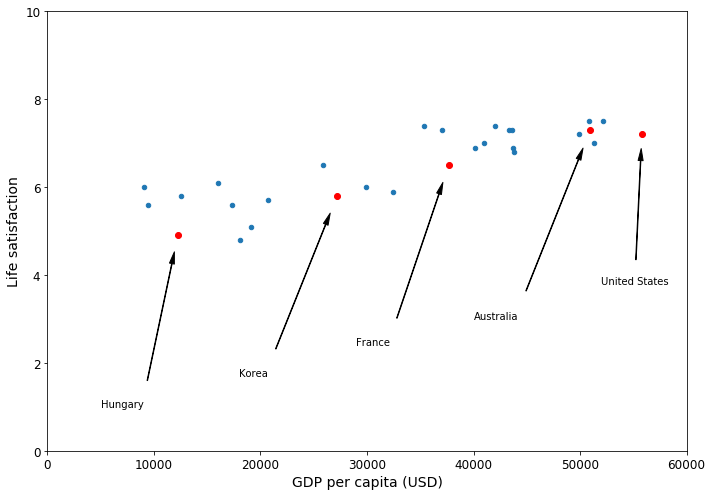

In [159]:
sample_data.plot(kind='scatter', x="GDP per capital", y='Life satisfaction', figsize=(10, 7))
plt.axis([0, 60000, 0, 10])

position_text = {
    "Hungary": (5000, 1),
    "Korea": (18000, 1.7),
    "France": (29000, 2.4),
    "Australia": (40000, 3.0),
    "United States": (52000, 3.8),
}

for country, pos_text in position_text.items():
    pos_data_x, pos_data_y = sample_data.loc[country]
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
                arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")
plt.xlabel("GDP per capita (USD)")
save_figure('money_happy_scatterplot')
plt.show()

In [206]:
sample_data.to_csv(os.path.join("datasets", "lifesat", "lifesat.csv"))

In [207]:
sample_data.loc[list(position_text.keys())]

,GDP per capital,Life satisfaction
Country,,
Hungary,12239.894,4.9
Korea,27195.197,5.8
France,37675.006,6.5
Australia,50961.865,7.3
United States,55805.204,7.2


Saving the figure tweaking_model_params_plot


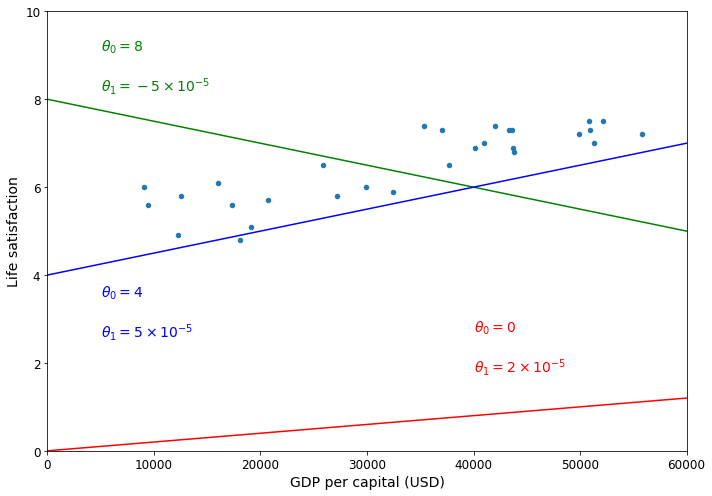

In [164]:
import numpy as np


sample_data.plot(kind='scatter', x='GDP per capital', y='Life satisfaction', figsize=(10, 7))
plt.xlabel("GDP per capital (USD)")
plt.axis([0, 60000, 0, 10])
X = np.linspace(0, 60000, 1000)
plt.plot(X, 2*X/100000, "r")
plt.text(40000, 2.7, r"$\theta_0 = 0$", fontsize=14, color="r")
plt.text(40000, 1.8, r"$\theta_1 = 2 \times 10^{-5}$", fontsize=14, color="r")
plt.plot(X, 8 - 5*X/100000, "g")
plt.text(5000, 9.1, r"$\theta_0 = 8$", fontsize=14, color="g")
plt.text(5000, 8.2, r"$\theta_1 = -5 \times 10^{-5}$", fontsize=14, color="g")
plt.plot(X, 4 + 5*X/100000, "b")
plt.text(5000, 3.5, r"$\theta_0 = 4$", fontsize=14, color="b")
plt.text(5000, 2.6, r"$\theta_1 = 5 \times 10^{-5}$", fontsize=14, color="b")
save_figure('tweaking_model_params_plot')
plt.show()

In [209]:
from sklearn import linear_model

linear = linear_model.LinearRegression()
X_sample = np.c_[sample_data["GDP per capital"]]
Y_sample = np.c_[sample_data['Life satisfaction']]
linear.fit(X_sample, Y_sample)
t0, t1 = linear.intercept_[0], linear.coef_[0][0]
t0, t1

(4.853052800266436, 4.911544589158483e-05)

Saving the figure best_fit_model_plot


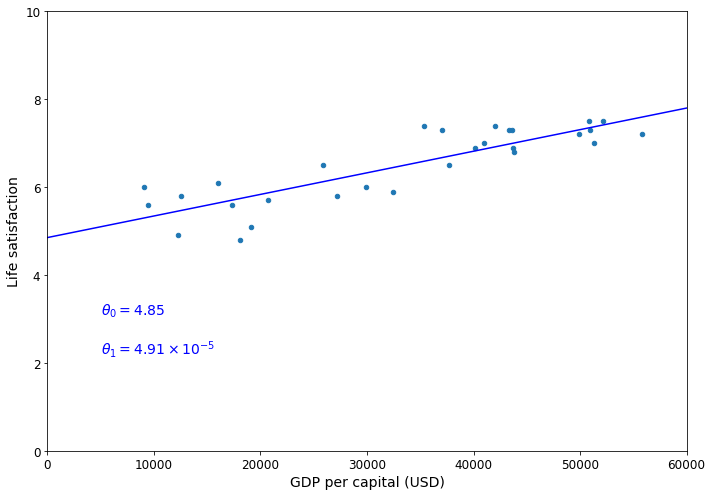

In [210]:
sample_data.plot(kind='scatter', x="GDP per capital", y='Life satisfaction', figsize=(10,7))
plt.xlabel("GDP per capital (USD)")
plt.axis([0, 60000, 0, 10])
X=np.linspace(0, 60000, 1000)
plt.plot(X, t0 + t1*X, "b")
plt.text(5000, 3.1, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 2.2, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")
save_figure('best_fit_model_plot')
plt.show()

In [222]:
country = ['Uganda']
country_gdp_per_capital = gdp_per_capital.loc[country[0]]["GDP per capital"]
print(country_gdp_per_capital)
predict_life_satisfaction = linear.predict([[country_gdp_per_capital]])[0][0]
predict_life_satisfaction

620.2130000000001


4.8835148383091935

In [223]:
country = ['United States']
country_gdp_per_capital = gdp_per_capital.loc[country[0]]["GDP per capital"]
print(country_gdp_per_capital)
predict_life_satisfaction = linear.predict([[country_gdp_per_capital]])[0][0]
predict_life_satisfaction

55805.204000000005


7.59395027779729

In [224]:
country = ['Seychelles']
country_gdp_per_capital = gdp_per_capital.loc[country[0]]["GDP per capital"]
print(country_gdp_per_capital)
predict_life_satisfaction = linear.predict([[country_gdp_per_capital]])[0][0]
predict_life_satisfaction

14940.706


5.586872237391513

Saving the figure Seychelles_prediction_plot


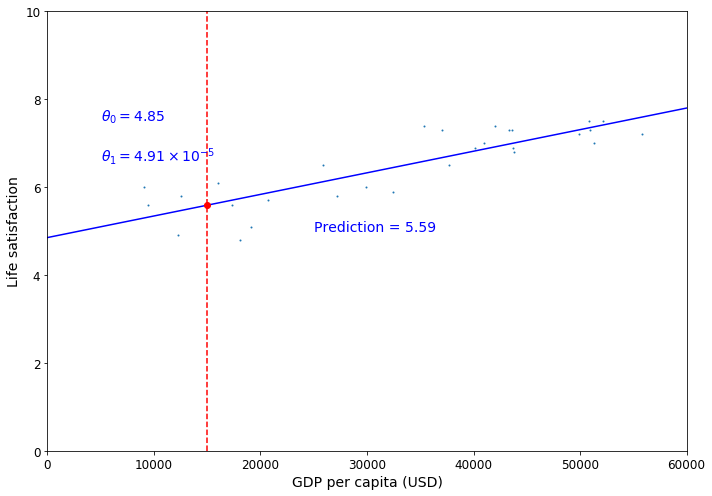

In [226]:
sample_data.plot(kind='scatter', x="GDP per capital", y='Life satisfaction', figsize=(10,7), s=1)
plt.xlabel("GDP per capita (USD)")
X=np.linspace(0, 60000, 1000)
plt.plot(X, t0 + t1*X, "b")
plt.axis([0, 60000, 0, 10])
plt.text(5000, 7.5, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 6.6, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")
plt.plot([country_gdp_per_capital, country_gdp_per_capital], [0, country_gdp_per_capital], "r--")
plt.text(25000, 5.0, r"Prediction = 5.59", fontsize=14, color="b")
plt.plot(country_gdp_per_capital, predict_life_satisfaction, "ro")
save_figure('Seychelles_prediction_plot')
plt.show()

In [229]:
sample_data[7:10]

,GDP per capital,Life satisfaction
Country,,
Portugal,19121.592,5.1
Slovenia,20732.482,5.7
Spain,25864.721,6.5


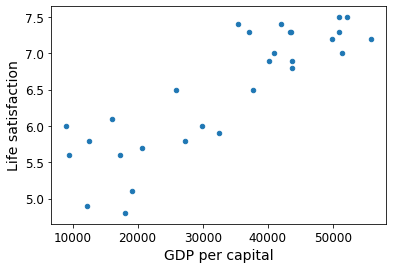

[[5.96242338]]


In [247]:
# Code example
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Load the data
oecd_bil = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capital = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

# Prepare the data
country_stats = prepare_country_satisfactions(oecd_bil, gdp_per_capital)
X = np.c_[country_stats["GDP per capital"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capital", y='Life satisfaction')
plt.show()

# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
print(model.predict(X_new)) # outputs [[ 5.96242338]]

In [245]:
missing_data

,GDP per capital,Life satisfaction
Country,,
Brazil,8669.998,7.0
Mexico,9009.280,6.7
Chile,13340.905,6.7
Czech Republic,17256.918,6.5
Norway,74822.106,7.4
Switzerland,80675.308,7.5
Luxembourg,101994.093,6.9


In [246]:
position_text2 = {
    "Brazil": (1000, 9.0),
    "Mexico": (11000, 9.0),
    "Chile": (25000, 9.0),
    "Czech Republic": (35000, 9.0),
    "Norway": (60000, 3),
    "Switzerland": (72000, 3.0),
    "Luxembourg": (90000, 3.0),
}

Saving the figure representative_training_data_scatterplot


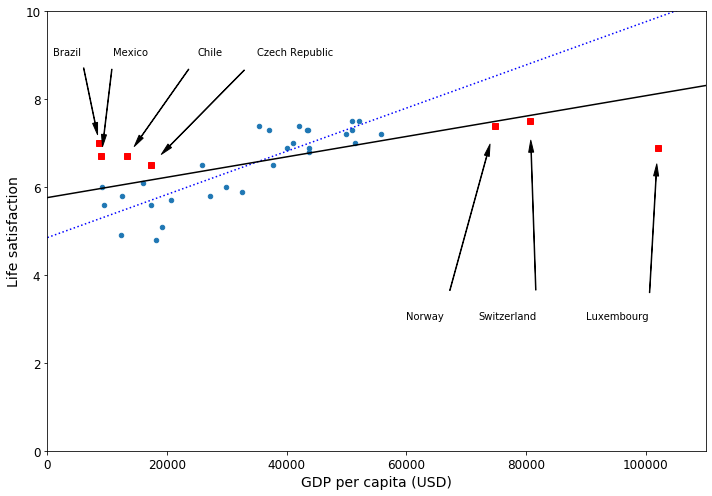

In [251]:
sample_data.plot(kind='scatter', x="GDP per capital", y='Life satisfaction', figsize=(10, 7))
plt.axis([0, 110000, 0 , 10])

for country, pos_text in position_text2.items():
    pos_data_x, pos_data_y = missing_data.loc[country]
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
                arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "rs")

X = np.linspace(0, 110000, 1000)
plt.plot(X, t0 + t1 * X, "b:")

lin_reg_full = linear_model.LinearRegression()
Xfull = np.c_[full_country_satisfactions["GDP per capital"]]
yfull = np.c_[full_country_satisfactions["Life satisfaction"]]
lin_reg_full.fit(Xfull, yfull)

t0full, t1full = lin_reg_full.intercept_[0], lin_reg_full.coef_[0][0]
X = np.linspace(0, 110000, 1000)
plt.plot(X, t0full + t1full * X, "k")
plt.xlabel("GDP per capita (USD)")

save_figure('representative_training_data_scatterplot')
plt.show()

C:\Users\galax\AppData\Local\conda\conda\envs\tf2\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)
C:\Users\galax\AppData\Local\conda\conda\envs\tf2\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Saving the figure overfitting_model_plot


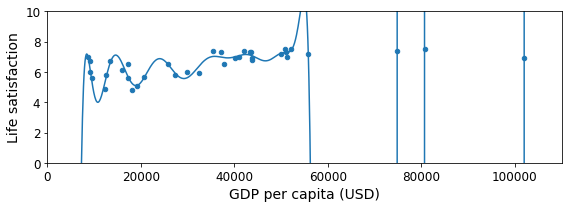

In [253]:
full_country_satisfactions.plot(kind='scatter', x="GDP per capital", y='Life satisfaction', figsize=(8,3))
plt.axis([0, 110000, 0, 10])

from sklearn import preprocessing
from sklearn import pipeline

poly = preprocessing.PolynomialFeatures(degree=60, include_bias=False)
scaler = preprocessing.StandardScaler()
lin_reg2 = linear_model.LinearRegression()

pipeline_reg = pipeline.Pipeline([('poly', poly), ('scal', scaler), ('lin', lin_reg2)])
pipeline_reg.fit(Xfull, yfull)
curve = pipeline_reg.predict(X[:, np.newaxis])
plt.plot(X, curve)
plt.xlabel("GDP per capita (USD)")
save_figure('overfitting_model_plot')
plt.show()

In [254]:
# with this k-neighbors regression model:
import sklearn.neighbors
model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

In [255]:
X = np.c_[country_stats["GDP per capital"]]
y = np.c_[country_stats["Life satisfaction"]]

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = np.array([[22587.0]])  # Cyprus' GDP per capita
print(model.predict(X_new)) # outputs [[ 5.76666667]]

[[5.76666667]]
